# Abhrajit Das
# U01880578

In [ ]:
%matplotlib inline

import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
# 1. load dataset
lyrics = pd.read_csv("taylor_swift_lyrics_2006-2022_all.csv")

#Inspected the first few rows
lyrics.head()

,album_name,track_title,track_n,lyric,line
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5


In [4]:
#Got info about the DataFrame
lyrics.info()

#No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   9370 non-null   object
 1   track_title  9370 non-null   object
 2   track_n      9370 non-null   int64 
 3   lyric        9370 non-null   object
 4   line         9370 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 366.1+ KB


In [23]:
# 2. Got a list of all the albums in this collection
print(lyrics.album_name.unique())

#We see that the release years are not mentioned. so we can manually add them or merge any other csv that contained the years.

['Fearless (Taylor’s Version)' 'Red (Deluxe Edition)' '1989 (Deluxe)'
 'midnights' 'midnights (3am edition)' 'reputation' 'Taylor Swift'
 'folklore (deluxe version)' 'Lover' 'evermore (deluxe version)'
 'Speak Now (Deluxe)']


In [6]:
#This is a function to map the name of the album to the year it was released
#Here we did some research and manually added the year an album was released

def album_release(row):  
    if row['album_name'] == 'Taylor Swift':
        return '2006'
    elif row['album_name'] == 'Fearless (Taylor’s Version)':
        return '2008'
    elif row['album_name'] == 'Speak Now (Deluxe)':
        return '2010'
    elif row['album_name'] == 'Red (Deluxe Edition)':
        return '2012'
    elif row['album_name'] == '1989 (Deluxe)':
        return '2014'
    elif row['album_name'] == 'reputation':
        return '2017'
    elif row['album_name'] == 'Lover':
        return '2019'
    elif row['album_name'] == 'evermore (deluxe version)':
        return '2020'
    elif row['album_name'] == 'folklore (deluxe version)':
        return '2021'
    
    return 'No Date'

#Applied the function to the album
lyrics['album_year'] = lyrics.apply(lambda row: album_release(row), axis=1)

#Inspected the first few rows of the DataFrame
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008


In [7]:
# 3. Cleaned the lyric text

#To accurately count keyword mentions, we need to:
#lowercase everything,
#remove punctuation,
#and exclude stop words.

#Saved this in a new column called clean_lyric

#lowercase
lyrics['clean_lyric'] = lyrics['lyric'].str.lower()

#remove punctuation
lyrics['clean_lyric']= lyrics['clean_lyric'].str.replace('[^\w\s]','')
lyrics.head()

#remove stopwords (see the next cell for illustration)
#create a small list of English stop words, feel free to edit this list
stop = ['the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']

#we make a list of words with `.split()`
#then we remove all the words in our list
#then we join the words back together into a string
lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008,there's something 'bout way
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008,street looks when it's just rained
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008,"there's glow off pavement, you walk me car"
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008,and you know i wanna ask you dance right there
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008,"in middle of parking lot, yeah"


In [8]:
#The next cells are for illustration only to see:

#what `.split()` does
lyrics['clean_lyric_list'] = lyrics['clean_lyric'].apply(lambda x: x.split())
print(lyrics.head())

#what `.join()` does
lyrics['clean_lyric_list_rejoined'] = lyrics['clean_lyric_list'].apply(lambda x: ' '.join(x))
print(lyrics.head())

#To remove those illustration columns
lyrics.drop(['clean_lyric_list', 'clean_lyric_list_rejoined'], axis=1, inplace=True)
print(lyrics.head())

#there are many pre-built lists of stopwords, including one from sklearn.
from sklearn.feature_extraction import text
skl_stop = text.ENGLISH_STOP_WORDS
print(skl_stop)

                    album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   

                                               lyric  line album_year  \
0                    There's something 'bout the way     1       2008   
1             The street looks when it's just rained     2       2008   
2  There's a glow off the pavement, you walk me t...     3       2008   
3  And you know I wanna ask you to dance right there     4       2008   
4             In the middle of the parking lot, yeah     5       2008   

                                      clean_lyric  \
0                     there's something 'bout way   
1              street 

In [25]:
# 4. Because we are most interested in "midnight", 
#we will first count how many times midnight occurs in Taylor Swift's lyrics.

#Created a new column to indicate if a lyric has "midnight" in it.
#We checked how many times midnight occurrs

#create a new column to reflect if the lyrics contain midnight
lyrics['midnight'] = lyrics['clean_lyric'].str.contains('midnight')
sum(lyrics['midnight'])

#Midnight is not very common -- it only appeared 9 times!

20

In [26]:
# 5. Expanded the keyword list
#Midnight might not be the only way that Taylor Swift has talked about night.
#We need to expand our list.
#We've made a list of night words and day words.

#Created two new columns, one for night words, and one for day words
#Joined the lists into a regular expression string using the .join() function and the | to indicate "or"
#Checked the clean lyrics for the presence of words in the regular expression we just made.
#Counted how many times the words appeared and print them to the screen
#Inspected the first few rows of the lyrics DataFrame to be sure it looks as you expect


#night, day, and other time-related words
night = ['night','midnight', 'dawn', 'dusk', 'evening', 'late', 'dark', '1am', '2am', '3am', '4am']
day = ['day', 'morning', 'light', 'sun', 'dawn', 'noon', 'golden', 'bright']
time = ['today', 'tomorrow', 'yesterday']

#create a regular expression string for each list of words
night_regex = '|'.join(night)
day_regex = '|'.join(day)
time_regex = '|'.join(time)

#create a new column for each category of words
lyrics['night'] = lyrics['clean_lyric'].str.contains(night_regex)
lyrics['day'] = lyrics['clean_lyric'].str.contains(day_regex)
lyrics['time'] = lyrics['clean_lyric'].str.contains(time_regex)

#count the number of times each category of word appears in the lyrics
night_count = sum(lyrics['night'])
day_count = sum(lyrics['day'])
time_count = sum(lyrics['time'])

#print the count of each word category
print("night words: ", night_count)
print("day words: ", day_count)
print("time words: ", time_count)

#inspect the first few rows
lyrics.head()

#Taylor Swift has referenced time alot,
#there's enough mentions for us to potentially spot some trends. 
#Also, she has mentioned day far more than night. 
#This might be because of the search terms, so we might consider revisiting the list.
#Or it could be because she is actually more focused on day and light than she is on night and dark.

night words:  287
day words:  387
time words:  35


,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008,there's something 'bout way,False,False,False,False,1.001
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008,street looks when it's just rained,False,False,False,False,1.002
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008,"there's glow off pavement, you walk me car",False,False,False,False,1.003
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008,and you know i wanna ask you dance right there,False,False,False,False,1.004
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008,"in middle of parking lot, yeah",False,False,False,False,1.005


In [31]:
# 6. Visualize how Taylor Swift's mentions of time have changed over time.
#Now that we know that she has referenced time, we can see if that has changed, 
#and if she has been dropping any hints about her upcoming album.

#Created a new dataframe called yearly_mentions that groups her mentions by year, 
#and takes the sum of the other columns. Reset the index on this DataFrame to make it easier to use with matplotlib
#Created a line chart in matplotlib showing the night mentions over time.

#created a new dataframe for yearly mentions that groups mentions by year
yearly_mentions = lyrics.groupby('album_year').sum().reset_index()
yearly_mentions

,album_year,album_name,track_title,track_n,lyric,line,clean_lyric,midnight,night,day,time,position,lyrics_tok
0,2006,Taylor SwiftTaylor SwiftTaylor SwiftTaylor Swi...,Tim McGrawTim McGrawTim McGrawTim McGrawTim Mc...,4867,He said the way my blue eyes shinedPut those G...,13456,he said way my blue eyes shinedput those georg...,0,19,25,3,4880.456,"[he, said, way, my, blue, eyes, shined, put, t..."
1,2008,Fearless (Taylor’s Version)Fearless (Taylor’s ...,Fearless (Taylor’s Version)Fearless (Taylor’s ...,15644,There's something 'bout the wayThe street look...,27793,there's something 'bout waystreet looks when i...,0,42,65,20,15671.793,"[there, 's, something, 'bout, way, street, loo..."
2,2010,Speak Now (Deluxe)Speak Now (Deluxe)Speak Now ...,MineMineMineMineMineMineMineMineMineMineMineMi...,8450,"You were in college, working part-time, waitin...",27489,"you in college, working part-time, waiting tab...",0,31,53,4,8477.489,"[you, in, college, ,, working, part-time, ,, w..."
3,2012,Red (Deluxe Edition)Red (Deluxe Edition)Red (D...,State of GraceState of GraceState of GraceStat...,11992,I'm walking fast through the traffic lightsBus...,27800,i'm walking fast through traffic lightsbusy st...,1,48,53,7,12019.800,"[i, 'm, walking, fast, through, traffic, light..."
4,2014,1989 (Deluxe)1989 (Deluxe)1989 (Deluxe)1989 (D...,Welcome to New YorkWelcome to New YorkWelcome ...,8424,"Walking through a crowd, the village is aglowK...",33546,"walking through crowd, village aglowkaleidosco...",2,27,41,0,8457.546,"[walking, through, crowd, ,, village, aglow, k..."
5,2017,reputationreputationreputationreputationreputa...,...Ready for It?...Ready for It?...Ready for I...,7640,Knew he was a killer first time that I saw him...,33775,knew he killer first time i saw himwondered ho...,3,25,25,0,7673.775,"[knew, he, killer, first, time, i, saw, him, w..."
6,2019,LoverLoverLoverLoverLoverLoverLoverLoverLoverL...,I Forgot That You ExistedI Forgot That You Exi...,8813,How many days did I spend thinking'Bout how yo...,25741,how many days did i spend thinking'bout how yo...,0,22,46,0,8838.741,"[how, many, days, did, i, spend, thinking, 'bo..."
7,2020,evermore (deluxe version)evermore (deluxe vers...,willowwillowwillowwillowwillowwillowwillowwill...,8443,I'm like the water when your ship rolled in th...,25712,i'm like water when your ship rolled in nightr...,2,18,38,0,8468.712,"[i, 'm, like, water, when, your, ship, rolled,..."
8,2021,folklore (deluxe version)folklore (deluxe vers...,the 1the 1the 1the 1the 1the 1the 1the 1the 1t...,6193,"I'm doing good, I'm on some new shitBeen sayin...",16854,"i'm doing good, i'm on some new shitsaying ""ye...",1,8,17,1,6209.854,"[i, 'm, doing, good, ,, i, 'm, on, some, new, ..."
9,No Date,midnightsmidnightsmidnightsmidnightsmidnightsm...,lavendar hazelavendar hazelavendar hazelavenda...,10553,Meet me at midnightStaring at the ceiling with...,27345,meet me at midnightstaring at ceiling with you...,11,47,24,0,10580.345,"[meet, me, at, midnight, staring, at, ceiling,..."


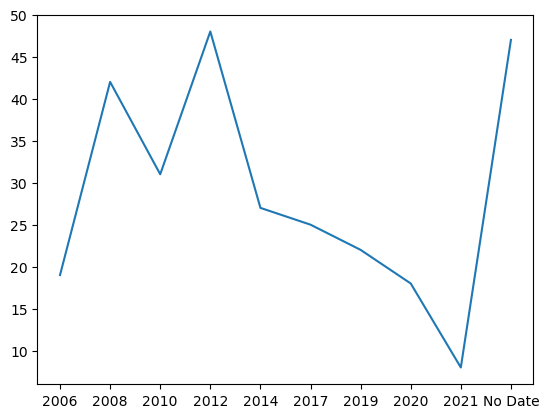

In [32]:
#plot the mentions of night over years
plt.plot(yearly_mentions['album_year'], yearly_mentions['night'])
plt.show()

#It looks like there was a peak in her mentioning night around 2012. 
#It seems like those mentions have become less prevalent over time, with an actual dip in 2019! 

In [34]:
# 7. What albums are the most night/day focused?

#Now that we have a table of counts, it's very easy to figure out which albums have the most mentions of day or night.
#But our DataFrame only has the years, not the album names. We need to add those back in.
#Ran the code that reinstates the album name for this dataframe.
#Use .sort_values() to order the yearly_mentions table and find which year has the most mentions of night.
#Did the same for the day column.

#reinstate the album name
#read the album_year_name.csv
year_name = pd.read_csv('album_year_name.csv')

#sort both dataframes by year
yearly_mentions.sort_values(by='album_year', ascending=True, inplace=True)
year_name.sort_values(by='album_year', ascending=True, inplace=True)

#add the new column for album name
yearly_mentions['album_name'] = year_name['album_name']

#sort the lyrics by the night column to find the albums with the most night references
yearly_mentions.sort_values(by='night', ascending=False)

#sort the lyrics by the day column to find the albums with the most day references
yearly_mentions.sort_values(by='day', ascending=False)


#It seems like her older work focused on day much more than her more recent. 
#There was a period of time (2008-2012) when she was really focused on day, 
#but it seems to have become less central to her work more recently.

,album_year,album_name,track_title,track_n,lyric,line,clean_lyric,midnight,night,day,time,position,lyrics_tok
1,2008,Red (Deluxe Edition),Fearless (Taylor’s Version)Fearless (Taylor’s ...,15644,There's something 'bout the wayThe street look...,27793,there's something 'bout waystreet looks when i...,0,42,65,20,15671.793,"[there, 's, something, 'bout, way, street, loo..."
2,2010,1989 (Deluxe),MineMineMineMineMineMineMineMineMineMineMineMi...,8450,"You were in college, working part-time, waitin...",27489,"you in college, working part-time, waiting tab...",0,31,53,4,8477.489,"[you, in, college, ,, working, part-time, ,, w..."
3,2012,reputation,State of GraceState of GraceState of GraceStat...,11992,I'm walking fast through the traffic lightsBus...,27800,i'm walking fast through traffic lightsbusy st...,1,48,53,7,12019.800,"[i, 'm, walking, fast, through, traffic, light..."
6,2019,Lover,I Forgot That You ExistedI Forgot That You Exi...,8813,How many days did I spend thinking'Bout how yo...,25741,how many days did i spend thinking'bout how yo...,0,22,46,0,8838.741,"[how, many, days, did, i, spend, thinking, 'bo..."
4,2014,Taylor Swift,Welcome to New YorkWelcome to New YorkWelcome ...,8424,"Walking through a crowd, the village is aglowK...",33546,"walking through crowd, village aglowkaleidosco...",2,27,41,0,8457.546,"[walking, through, crowd, ,, village, aglow, k..."
7,2020,evermore (deluxe version),willowwillowwillowwillowwillowwillowwillowwill...,8443,I'm like the water when your ship rolled in th...,25712,i'm like water when your ship rolled in nightr...,2,18,38,0,8468.712,"[i, 'm, like, water, when, your, ship, rolled,..."
0,2006,Fearless (Taylor’s Version),Tim McGrawTim McGrawTim McGrawTim McGrawTim Mc...,4867,He said the way my blue eyes shinedPut those G...,13456,he said way my blue eyes shinedput those georg...,0,19,25,3,4880.456,"[he, said, way, my, blue, eyes, shined, put, t..."
5,2017,folklore (deluxe version),...Ready for It?...Ready for It?...Ready for I...,7640,Knew he was a killer first time that I saw him...,33775,knew he killer first time i saw himwondered ho...,3,25,25,0,7673.775,"[knew, he, killer, first, time, i, saw, him, w..."
9,No Date,Midnights,lavendar hazelavendar hazelavendar hazelavenda...,10553,Meet me at midnightStaring at the ceiling with...,27345,meet me at midnightstaring at ceiling with you...,11,47,24,0,10580.345,"[meet, me, at, midnight, staring, at, ceiling,..."
8,2021,Speak Now (Deluxe),the 1the 1the 1the 1the 1the 1the 1the 1the 1t...,6193,"I'm doing good, I'm on some new shitBeen sayin...",16854,"i'm doing good, i'm on some new shitsaying ""ye...",1,8,17,1,6209.854,"[i, 'm, doing, good, ,, i, 'm, on, some, new, ..."


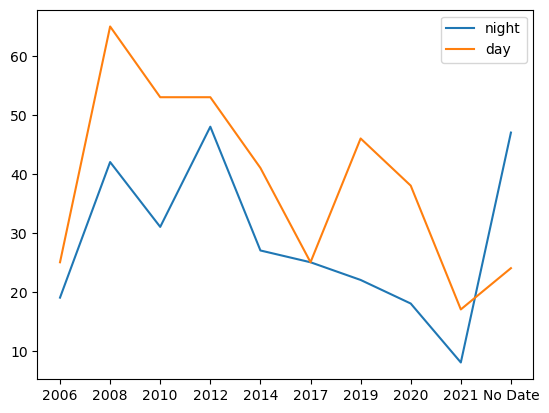

In [27]:
# 8. Compared day to night mentions

#create a plot with one line showing number of night references by year 
#and another line with the number of day references by year
plt.plot(yearly_mentions['album_year'], yearly_mentions['night'], label = 'night')
plt.plot(yearly_mentions['album_year'], yearly_mentions['day'], label = 'day')
plt.legend()
plt.show()

#We see a similar dip in referencing time around 2017,
#But a sharp increase in both 2019 and 2020 to reference day

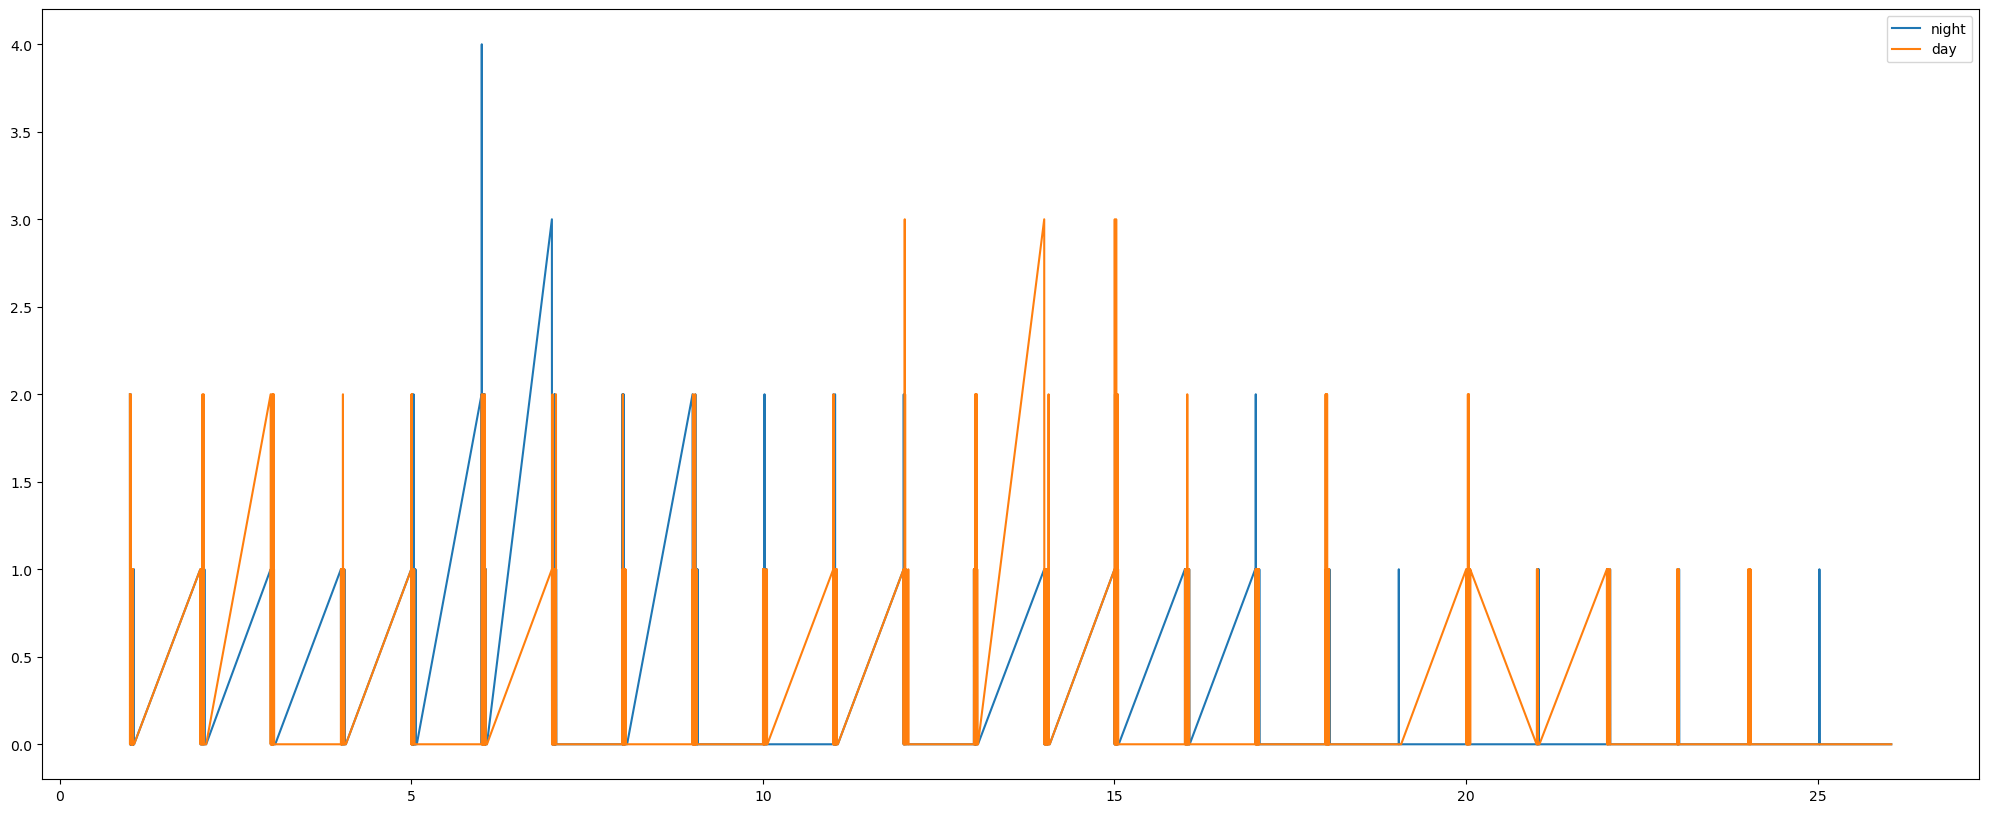

In [18]:
# 9. Investigated position of day vs. night mentions within albums

#Created a position variable that includes both the track number and line number
lyrics['position'] = lyrics['track_n'] + (lyrics['line']/1000)

#Create a new DataFrame that is grouped by position
positional_mentions = lyrics.groupby('position').sum().reset_index()

#Increase the size of the plot 
fig = plt.gcf()
fig.set_size_inches(25,10)

#Create a plot with two lines to show frequency of day vs. night references by position in the album
plt.plot(positional_mentions['position'], positional_mentions['night'], label = 'night')
plt.plot(positional_mentions['position'], positional_mentions['day'], label = 'day')
plt.legend()

plt.show()

#Honestly not that much. We can't see any strong trends here.

In [28]:
#Lets run this cell to tokenize the words in the clean_lyric column
lyrics['lyrics_tok'] = lyrics['clean_lyric'].apply(lambda x: word_tokenize(x))

In [29]:
#inspect the first few lines
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008,there's something 'bout way,False,False,False,False,1.001,"[there, 's, something, 'bout, way]"
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008,street looks when it's just rained,False,False,False,False,1.002,"[street, looks, when, it, 's, just, rained]"
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008,"there's glow off pavement, you walk me car",False,False,False,False,1.003,"[there, 's, glow, off, pavement, ,, you, walk,..."
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008,and you know i wanna ask you dance right there,False,False,False,False,1.004,"[and, you, know, i, wan, na, ask, you, dance, ..."
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008,"in middle of parking lot, yeah",False,False,False,False,1.005,"[in, middle, of, parking, lot, ,, yeah]"


In [30]:
# 10. Determined what words overall are the most frequently used words
#created a list of all the words in the lyrics_tok column
word_list = [word for list_ in lyrics['lyrics_tok'] for word in list_]

#used the counter function to count the number of times each word appears
word_frequency = collections.Counter(word_list)

#sorted the word frequencies to find out the most common words she's used. 
word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

#called the word frequency
word_frequency

[(',', 4358),
 ('i', 3898),
 ('you', 3582),
 ('and', 1844),
 ('it', 1475),
 ('me', 1146),
 ('in', 1003),
 ("'s", 979),
 ("n't", 947),
 ('my', 927),
 ('(', 725),
 (')', 725),
 ('we', 694),
 ('your', 689),
 ('of', 667),
 ('do', 638),
 ('all', 591),
 ('but', 581),
 ("'m", 563),
 ('like', 552),
 ('on', 539),
 ('?', 511),
 ('know', 477),
 ('so', 454),
 ('oh', 447),
 ("'re", 427),
 ('when', 417),
 ('never', 384),
 ('just', 374),
 ('for', 348),
 ('what', 340),
 ('with', 332),
 ('love', 330),
 ('now', 321),
 ("'ve", 306),
 ('up', 305),
 ("'", 305),
 ('na', 296),
 ('out', 287),
 ('time', 286),
 ("'ll", 285),
 ('if', 276),
 ('at', 276),
 ('back', 276),
 ("'cause", 245),
 ('no', 239),
 ('they', 238),
 ('are', 238),
 ('there', 237),
 ('``', 235),
 ('got', 235),
 ("''", 234),
 ('he', 233),
 ('one', 227),
 ('did', 226),
 ('could', 226),
 ('down', 218),
 ('say', 212),
 ('see', 211),
 ("'d", 207),
 ('think', 202),
 ('would', 198),
 ('baby', 197),
 ('can', 192),
 ('want', 189),
 ('go', 188),
 ('that', 